<a href="https://colab.research.google.com/github/ombelote/Tensorflow-Practice/blob/main/01_Neural_Network_regression_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensorflow
 There are many definitions for a regression problem but in our case were going to simplify it: predicting a numerical variable based on other combination of variables, even shorter... predicting a number


In [121]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Creating data to view and fit

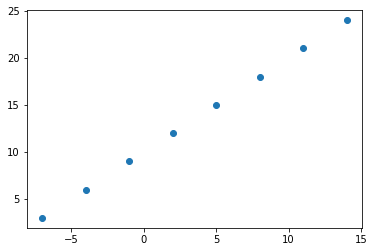

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X= np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels 
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)


In [123]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input shape and Output shape

In [124]:
house_info= tf.constant(['bedroom','bathroom','garage'])
house_price= tf.constant([199000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([199000], dtype=int32)>)

In [125]:
X[0], y[0]

(-7.0, 3.0)

In [126]:
input_shape= X[0].shape
output_shape= y[0].shape
input_shape, output_shape

((), ())

In [127]:
# turn our numpy arrays into tensors
X= tf.constant(X)
y= tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with tensorflow

1. Creating a model - define the i/p and o/p as well as the hidden layers
2. compiling a model - define the loss function and optimizer
3. Fitting a model - letting the model learn on the training data

In [128]:
# set random seed
tf.random.set_seed(42)
 
# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 307ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [129]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [130]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

# Improving Our model
1. Creating a model - add more layers, increase the number of hidden units
2. Compiling the model - loss, optimizer, learning rate
3. Fitting the model - epochs

In [131]:
# Lets rebuild our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [132]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [133]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [134]:
# Using an extra hidden layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation= 'relu'),
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - 

In [135]:
model.predict([17.0])

array([[31.223137]], dtype=float32)

In [136]:
# Using an extra hidden layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation= 'relu'),
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer = tf.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 397ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - lo

## Evaluating a model

In [137]:
# making a bigger dataset

X= tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [138]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

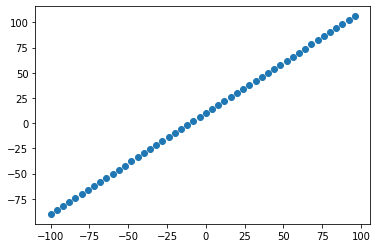

In [139]:
#Visualize the date:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets

* training set - 70-80%
* validation set - 10-15%
* test set - 10-15%

In [140]:
len(X)

50

In [141]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

##Visualizing the data

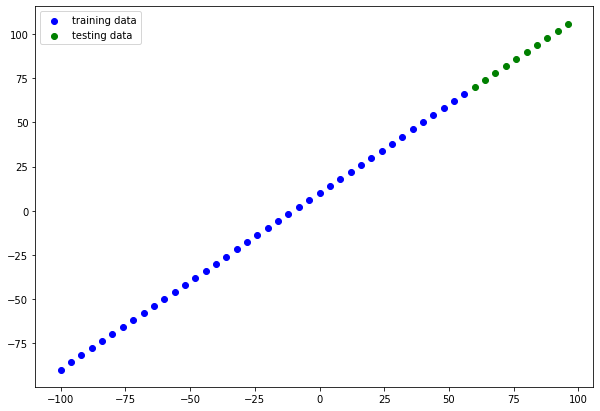

In [142]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label= 'training data')
plt.scatter(X_test, y_test, c= 'g', label= 'testing data')
plt.legend()

In [143]:
# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
# 2. compile the mode;
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])


In [144]:
# lets create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, input_shape= [1], name='input_layer'),
                            tf.keras.layers.Dense(1, name='output_layer')
])
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])


In [145]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* total params - total number of parameters
* trainable params - parameters whose values can be changed during training
* non-trainable params - parameters whose value doest cahnge during training

In [146]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [147]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


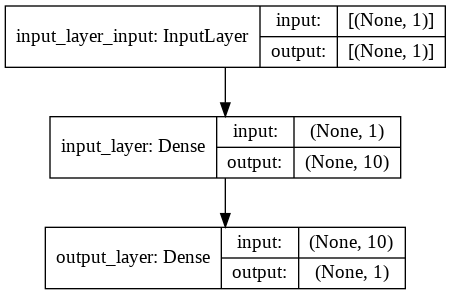

In [148]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes= True)

### Visualizing our model's predictions

To vizualize predicions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of 'y_test' of 'y_true' vs 'y_pred'

In [149]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [150]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [151]:
# lets create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c = "b", label = "Training data")

    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")

    plt.scatter(test_data, predictions, c = "r", label = "Predictions")

    plt.legend()

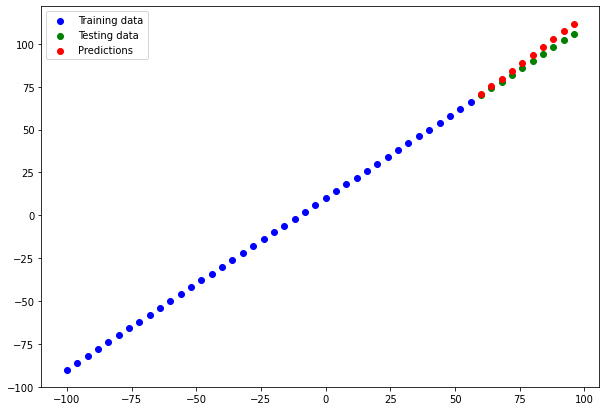

In [152]:
plot_predictions() # Uses the defaults values mentioned.

### Evaluating our model predictions with regression evaluation metrics

Dpending on the problem u are working on there will be different metrics,
Since we are working on regression, two of the main metrics are :
* Mean absoluute error: abs(y_pred- y_actual)/ size
* Mean squared error: (y_pred- y_actual)^2 / size

In [153]:
# Evaluate th model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 108ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [154]:
tf.metrics.mean_absolute_error(y_true= y_test, y_pred= y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

### WE get such values because y_test and y_pred are of the same dimension

In [155]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [156]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [157]:
# Calcualte the mean absolute error
tf.metrics.mean_absolute_error(y_true= y_test, y_pred= tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [158]:
tf.metrics.mean_squared_error(y_true= y_test, y_pred= tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [159]:
# make some functions to reuse mae and mse
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, y_pred= tf.squeeze(y_pred))


def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, y_pred= tf.squeeze(y_pred))

### Running an experiment to improve our model

1. Get more data - get more examples
2. Make our model larger - using more layers
3. train for longer - more epochs

Our 3 model experiments:

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 people


In [160]:
# Build Model_1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss:

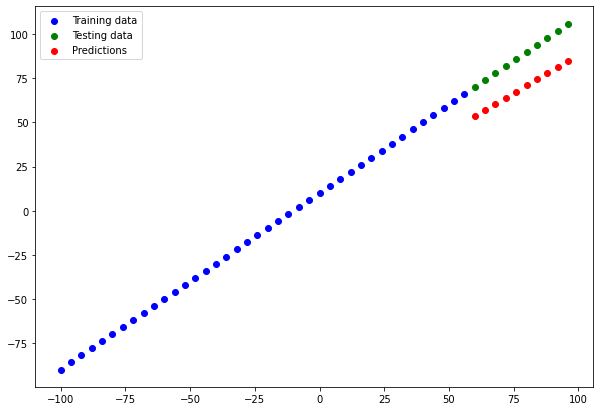

In [161]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)

In [162]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)

mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [163]:
# Build model 2

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 31.5187 - mse: 1433.3082
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8490 - mse: 1141.6672
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 28.3537 - mse: 1129.8183
Epoch 11/100
2/2 [=========================

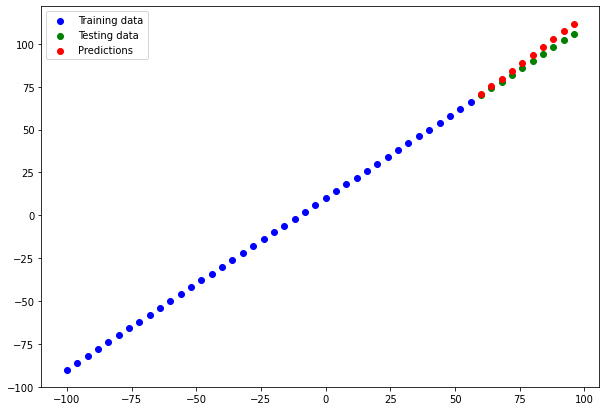

In [164]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [165]:
mae_2 = mae(y_test, y_preds_2)

mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [166]:
# Build model 3

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_3.fit(X_train, y_train, epochs= 500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 31.5187 - mse: 1433.3082
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8490 - mse: 1141.6672
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 28.3537 - mse: 1129.8183
Epoch 11/500
2/2 [==========================

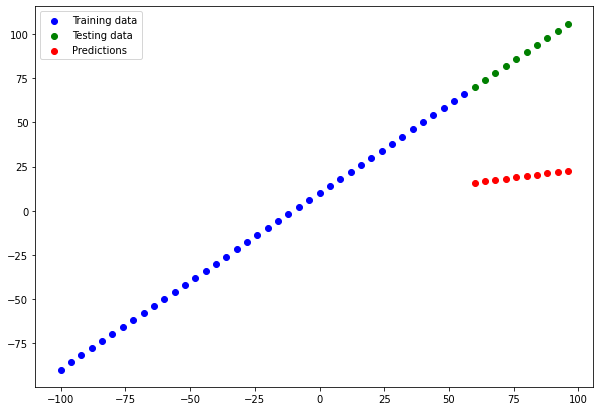

In [167]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [168]:
mae_3 = mae(y_test, y_pred_3)

mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments 


In [169]:
# comparing our model results using a pandas dataframe
import pandas as pd
model_results = [
                 ['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]
                ]
                

In [170]:
all_results = pd.DataFrame(model_results, columns= ['models', 'mae', 'mse'])
all_results

,models,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [171]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Saving our models allows us to use them outside of google colab or a mobile app
There are two main formats we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [172]:
# save model using savemodel fromat
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [173]:
# save model using the hdf5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model


In [174]:
#Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [175]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Compare model_2 predictions with SavedModel fromat model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [177]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [178]:
mae(y_true=y_test, y_pred = model_2_preds) == mae(y_true=y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [179]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Download a model from google colab
    If you want to download files from google colab:
        1. You can go to files tab and right click on the file you're after and click "download"
        2. Use code
        3. Save it to google drive by connecting to google drive and copy it there
        

In [180]:
# Download a file from google colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/AAIC_Resources

In [183]:
!ls /content/drive/MyDrive/AAIC_Resources

/content/drive/MyDrive/AAIC_Resources


# A Larger example

In [184]:
insurance= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [185]:
insurance['sex'], insurance['smoker'], insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [186]:
# one hot encoding our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [187]:
# Create X & Y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges'] 

In [188]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [189]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [190]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [191]:
# Build a neural network like model_2
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6838 - mae: 7520.68

In [192]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [193]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

# lets improve our model

To try to improve our model we perform 2 experiments:
1. Add and extra layer with more hidden units
2. Train for longer
3. insert you own experiment here

In [194]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=['mae'])
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [195]:
insurance_model.evaluate(X_train, y_train)


34/34 [==============================] - 0s 1ms/step - loss: 7070.7476 - mae: 7070.7476


[7070.74755859375, 7070.74755859375]

In [196]:
insurance_model_2.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 5012.6206 - mae: 5012.6206


[5012.62060546875, 5012.62060546875]

In [197]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [198]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=['mae'])
history= insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [199]:
# evaluate our 3rd model
insurance_model_3.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3665.3799 - mae: 3665.3799


[3665.3798828125, 3665.3798828125]

In [200]:
insurance_model.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 7070.7476 - mae: 7070.7476


[7070.74755859375, 7070.74755859375]

Text(0, 0.5, 'epochs')

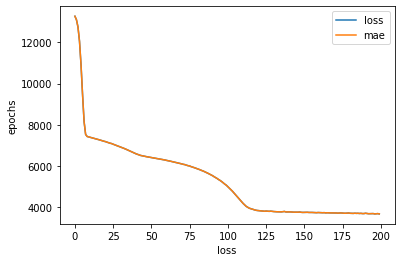

In [201]:
# plot a history (also known as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel('loss')
plt.ylabel('epochs')

# preprossesing data (normalization and standardization)

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [203]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create coulmn transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # turn all values in these between 0 and 1
    (OneHotEncoder(handle_unknown= 'ignore'), ['sex', 'smoker', 'region'])
)

# Create our X and Y

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# fit the transformer into training data 
ct.fit(X_train)

#Transform training and test data with normalization and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [204]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [205]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [206]:
# Build a neural network model to fit our normalized data
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1),
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.99

In [209]:
# evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]


insurance_model_2.evaluate(X_test, y_test)
9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477
[4924.34765625, 4924.34765625]


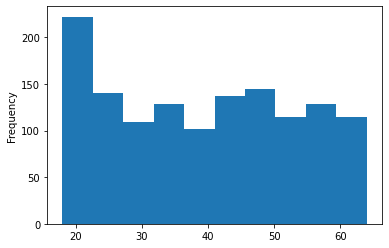

In [99]:
X['age'].plot(kind= 'hist')

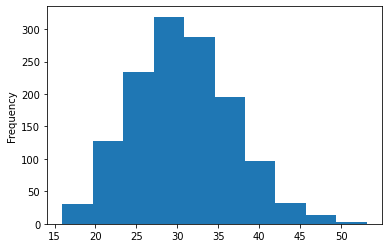

In [100]:
X['bmi'].plot(kind= 'hist')

In [101]:
X['children'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64>